In [1]:
from IPython.core.display import HTML
with open('../style.css', 'r') as file:
    css = file.read()
HTML(css)

This notebook is used to test the conversion of non-deterministic <span style="font-variant:small-caps;">Fsm</span>s into deterministic <span style="font-variant:small-caps;">Fsm</span>s.

In [2]:
%run NFA-2-DFA.ipynb

Version 1.0.5


Unfortunately, the `%run` magic does not work with the `mypy`extension for notebooks.  
Hence we have to switch it off.

In [3]:
%nb_mypy Off

In order to represent the <span style="font-variant:small-caps;">Fsm</span>s graphically, we use the notebook `FSM-2-Dot.ipynb`.  This notebook uses the package `graphviz`, wich can be installed by the following commands.

In [4]:
!conda install -y -c  anaconda graphviz
!conda install -y -c  anaconda python-graphviz

Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.9.0



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.9.0



# All requested packages already installed.



In [5]:
%run FSM-2-Dot.ipynb

In [6]:
States = { 'q' + str(i) for i in range(8) }
States

{'q0', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7'}

In [7]:
Sigma = { 'a', 'b' }

In [ ]:
delta = {
    ('q0',  '𝜀'): { 'q1', 'q2'},
    ('q1', 'b'): { 'q3' },
    ('q2', 'a'): { 'q4' },
    ('q3', 'a'): { 'q5' },
    ('q4', 'b'): { 'q6' },
    ('q5',  '𝜀'): { 'q7' },
    ('q6',  '𝜀'): { 'q7' },
    ('q7',  '𝜀'): { 'q0' }
}

In [28]:
States = {'4', '1', '2', '3'}
delta = {
    ('4', 'a'): {'4'},
    ('4', 'b'): {'4','1'},
    ('1', 'a'): {'2'},
    ('1', 'b'): {'2'},
    ('2', 'a'): {'3'},
    ('2', 'b'): {'3'}
}

The non-deterministic <span style="font-variant:small-caps;">Fsm</span> defined below is taken from the lecture notes.

In [29]:
nfa_aufgabe6 = States, Sigma, delta, '4', { '3' }

In [ ]:
nfa44 = States, Sigma, delta, 'q0', { 'q7' }

The function `nfa2dot`can be used to render this <span style="font-variant:small-caps;">Fsm</span>.

In [30]:
d = nfa2dot(nfa_aufgabe6)

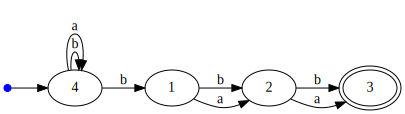

In [31]:
d

This recognizes the same language as the language described by
$$ (a\cdot b + b \cdot a)  \cdot (a\cdot b + b \cdot a)^* $$
Let us convert it into a deterministic <span style="font-variant:small-caps;">Fsm</span>: 

In [32]:
dfa44 = nfa2dfa(nfa_aufgabe6)

The function `dfa2dot`can be used to render this <span style="font-variant:small-caps;">Fsm</span>.

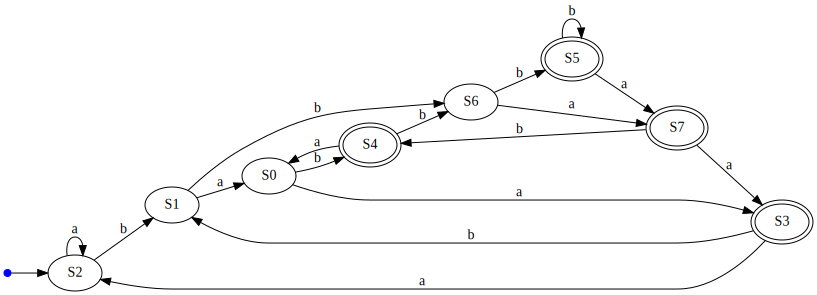

In [33]:
dot, states2Names = dfa2dot(dfa44)
dot

In order to inspect the states of this deterministic <span style="font-variant:small-caps;">Fsm</span> we print the dictionary  `states2Names`.

In [34]:
states2Names

{frozenset({'2', '4'}): 'S0',
 frozenset({'1', '4'}): 'S1',
 frozenset({'4'}): 'S2',
 frozenset({'3', '4'}): 'S3',
 frozenset({'1', '3', '4'}): 'S4',
 frozenset({'1', '2', '3', '4'}): 'S5',
 frozenset({'1', '2', '4'}): 'S6',
 frozenset({'2', '3', '4'}): 'S7'}

We can also print the <span style="font-variant:small-caps;">Fsm</span>.

In [ ]:
dfa44